<a href="https://colab.research.google.com/github/Bhawani-Rabisankar-Sahoo/Sales_Analysis/blob/Tuning_tesing/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Analysis

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://github.com/Bhawani-Rabisankar-Sahoo/Datma-Sc/blob/master/Sales%20Analysis/sales_analysis_data.csv?raw=true")

df.head(100)

#df= df.dropna()
df

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1           NaN                         NaN              NaN        NaN   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001  
1                  NaN                                      NaN  
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
...                ...                                      ...  
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016  
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[186850 rows x 6 columns]

In [3]:
nan_df = df[df.isna().any(axis=1)]

nan_df.head()

df = df.dropna(how = 'all')
df

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001  
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
5       04/30/19 09:27        333 8th St, Los Angeles, CA 90001  
...                ...                                      ...  
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016  
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[186305 rows x 6 columns]

In [4]:
df = df[df['Order Date'].str[0:2]!='Or']

In [5]:
#df = df[df['Order Date'].str[0:2]!='Or']
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df

<ipython-input-5-44a8940d8ab1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
<ipython-input-5-44a8940d8ab1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'])


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001  
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
5       04/30/19 09:27        333 8th St, Los Angeles, CA 90001  
...                ...                                      ...  
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016  
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[185950 rows x 6 columns]

In [6]:
#df.iloc[519 , :]

In [7]:
df['month'] = df['Order Date'].str[0:2]
df

df['month']=df['month'].astype(np.int32)




<ipython-input-7-61d3d747482c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Order Date'].str[0:2]
<ipython-input-7-61d3d747482c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['month'].astype(np.int32)


In [8]:
df =df.drop(df.index[519])

In [9]:
df['sales'] = df['Quantity Ordered'] * df['Price Each']
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address  month   sales  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001      4   23.90  
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215      4   99.99  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4  600.00  
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   11.99  
5       04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   11.99  
...                ...                                      ...    ...     ...  
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9    8.97  
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016      9  700.00  
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016      9  700.00  
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9  379.99  
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9   11.95  

[185949 rows x 8 columns]

# Adding a city column by .apply()

In [10]:
def get_city(Address):
  return Address.split(',')[1]

def get_state(Address):
  return Address.split(',')[2]

#df['city'] =df['Purchase Address'].apply(lambda x :get_city(x))
df['city'] =df['Purchase Address'].apply(lambda x :get_city(x) + ' '  + get_state(x))
df


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address  month  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001      4   
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215      4   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
5       04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   
...                ...                                      ...    ...   
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9   
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016      9   
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016      9   
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9   
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9   

         sales                      city  
0        23.90          Dallas  TX 75001  
2        99.99          Boston  MA 02215  
3       600.00     Los Angeles  CA 90001  
4        11.99     Los Angeles  CA 90001  
5        11.99     Los Angeles  CA 90001  
...        ...                       ...  
186845    8.97     Los Angeles  CA 90001  
186846  700.00   San Francisco  CA 94016  
186847  700.00   San Francisco  CA 94016  
186848  379.99   San Francisco  CA 94016  
186849   11.95   San Francisco  CA 94016  

[185949 rows x 9 columns]

In [11]:
def get_city(Address):
  return Address.split(',')[1]

def get_state(Address):
  return Address.split(',')[2].split(' ')[1]

#df['city'] =df['Purchase Address'].apply(lambda x :get_city(x))
df['city'] =df['Purchase Address'].apply(lambda x :get_city(x) + ' '  + '(' + get_state(x) +')')
df


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

            Order Date                         Purchase Address  month  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001      4   
2       04/07/19 22:30        682 Chestnut St, Boston, MA 02215      4   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
4       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
5       04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   
...                ...                                      ...    ...   
186845  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9   
186846  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016      9   
186847  09/23/19 07:39     220 12th St, San Francisco, CA 94016      9   
186848  09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9   
186849  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9   

         sales                 city  
0        23.90          Dallas (TX)  
2        99.99          Boston (MA)  
3       600.00     Los Angeles (CA)  
4        11.99     Los Angeles (CA)  
5        11.99     Los Angeles (CA)  
...        ...                  ...  
186845    8.97     Los Angeles (CA)  
186846  700.00   San Francisco (CA)  
186847  700.00   San Francisco (CA)  
186848  379.99   San Francisco (CA)  
186849   11.95   San Francisco (CA)  

[185949 rows x 9 columns]

In [12]:
result = df.groupby('month').sum()
result['sales']

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390570.25
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

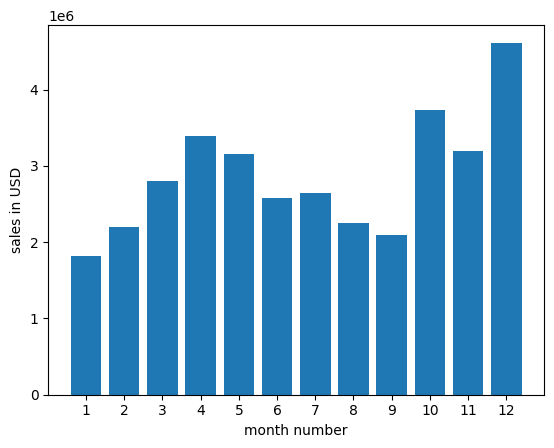

In [13]:
months = range(1,13)

plt.bar(months,result['sales'])
plt.xticks(months)
plt.xlabel('month number')
plt.ylabel('sales in USD')


plt.show()

In [14]:
result = df.groupby('city').sum()

result

Order ID  \
city                                                                    
Atlanta (GA)        1765641765711765821765891766231766271766341766...   
Austin (TX)         1765911766091766741766771766861767011767051767...   
Boston (MA)         1765591765661765781765811765851765851766001766...   
Dallas (TX)         1765581765691765701765771765961766021766101766...   
Los Angeles (CA)    1765601765601765611765671765741765741765761765...   
New York City (NY)  1765721765751765791765901765991766131766371766...   
Portland (ME)       1767731768791769091770721772301772331772991773...   
Portland (OR)       1765831765931766171766421766461766481766621767...   
San Francisco (CA)  1765621765651765731765841765861765861765941765...   
Seattle (WA)        1765631765681765881766121766241766541766631766...   

                                                              Product  \
city                                                                    
Atlanta (GA)        USB-C Charging CableLightning Charging CableBo...   
Austin (TX)         Apple Airpods HeadphonesApple Airpods Headphon...   
Boston (MA)         Bose SoundSport HeadphonesWired HeadphonesAppl...   
Dallas (TX)         USB-C Charging Cable27in 4K Gaming MonitorAA B...   
Los Angeles (CA)    Google PhoneWired HeadphonesWired HeadphonesGo...   
New York City (NY)  Apple Airpods HeadphonesAAA Batteries (4-pack)...   
Portland (ME)       AAA Batteries (4-pack)Flatscreen TVWired Headp...   
Portland (OR)       AAA Batteries (4-pack)Lightning Charging Cable...   
San Francisco (CA)  USB-C Charging CableMacbook Pro LaptopUSB-C Ch...   
Seattle (WA)        Bose SoundSport HeadphonesLightning Charging C...   

                    Quantity Ordered  Price Each  \
city                                               
Atlanta (GA)                   16602  2779908.20   
Austin (TX)                    11153  1809873.61   
Boston (MA)                    22528  3637409.77   
Dallas (TX)                    16730  2752627.82   
Los Angeles (CA)               33289  5421435.23   
New York City (NY)             27931  4635270.84   
Portland (ME)                   2750   447189.25   
Portland (OR)                  11303  1860558.22   
San Francisco (CA)             50239  8211461.74   
Seattle (WA)                   16553  2733296.01   

                                                           Order Date  \
city                                                                    
Atlanta (GA)        04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...   
Austin (TX)         04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...   
Boston (MA)         04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...   
Dallas (TX)         04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...   
Los Angeles (CA)    04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...   
New York City (NY)  04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...   
Portland (ME)       04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...   
Portland (OR)       04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...   
San Francisco (CA)  04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...   
Seattle (WA)        04/02/19 07:4604/15/19 12:1804/02/19 04:0004/0...   

                                                     Purchase Address   month  \
city                                                                            
Atlanta (GA)        790 Ridge St, Atlanta, GA 30301253 Johnson St,...  104794   
Austin (TX)         600 Maple St, Austin, TX 73301267 11th St, Aus...   69829   
Boston (MA)         682 Chestnut St, Boston, MA 0221583 7th St, Bo...  141112   
Dallas (TX)         917 1st St, Dallas, TX 75001657 Hill St, Dalla...  104620   
Los Angeles (CA)    669 Spruce St, Los Angeles, CA 90001669 Spruce...  208325   
New York City (NY)  149 Dogwood St, New York City, NY 10001433 Hil...  175737   
Portland (ME)       30 9th St, Portland, ME 04101370 Sunset St, Po...   17144   
Portland (OR)       146 Jackson St, Portland, OR 97035906 7th St, ...   7062

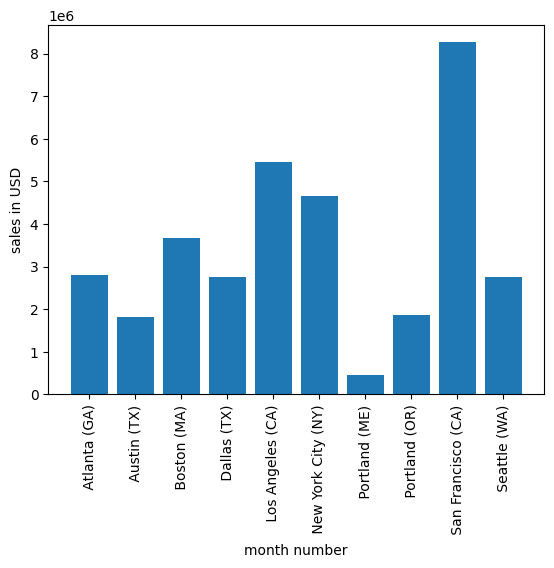

In [15]:
#city = df['city'].unique()   #order not going to remain same as expected

city = [city for city , df in df.groupby('city')]

plt.bar(city,result['sales'])
plt.xticks(city ,  rotation ='vertical')
plt.xlabel('month number')
plt.ylabel('sales in USD')


plt.show()

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df

<ipython-input-16-e419b3dd7a76>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

                Order Date                         Purchase Address  month  \
0      2019-04-19 08:46:00             917 1st St, Dallas, TX 75001      4   
2      2019-04-07 22:30:00        682 Chestnut St, Boston, MA 02215      4   
3      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
4      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
5      2019-04-30 09:27:00        333 8th St, Los Angeles, CA 90001      4   
...                    ...                                      ...    ...   
186845 2019-09-17 20:56:00   840 Highland St, Los Angeles, CA 90001      9   
186846 2019-09-01 16:00:00  216 Dogwood St, San Francisco, CA 94016      9   
186847 2019-09-23 07:39:00     220 12th St, San Francisco, CA 94016      9   
186848 2019-09-19 17:30:00   511 Forest St, San Francisco, CA 94016      9   
186849 2019-09-30 00:18:00   250 Meadow St, San Francisco, CA 94016      9   

         sales                 city  
0        23.90          Dallas (TX)  
2        99.99          Boston (MA)  
3       600.00     Los Angeles (CA)  
4        11.99     Los Angeles (CA)  
5        11.99     Los Angeles (CA)  
...        ...                  ...  
186845    8.97     Los Angeles (CA)  
186846  700.00   San Francisco (CA)  
186847  700.00   San Francisco (CA)  
186848  379.99   San Francisco (CA)  
186849   11.95   San Francisco (CA)  

[185949 rows x 9 columns]

In [17]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

                Order Date                         Purchase Address  month  \
0      2019-04-19 08:46:00             917 1st St, Dallas, TX 75001      4   
2      2019-04-07 22:30:00        682 Chestnut St, Boston, MA 02215      4   
3      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
4      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
5      2019-04-30 09:27:00        333 8th St, Los Angeles, CA 90001      4   
...                    ...                                      ...    ...   
186845 2019-09-17 20:56:00   840 Highland St, Los Angeles, CA 90001      9   
186846 2019-09-01 16:00:00  216 Dogwood St, San Francisco, CA 94016      9   
186847 2019-09-23 07:39:00     220 12th St, San Francisco, CA 94016      9   
186848 2019-09-19 17:30:00   511 Forest St, San Francisco, CA 94016      9   
186849 2019-09-30 00:18:00   250 Meadow St, San Francisco, CA 94016      9   

         sales                 city  Hour  Minute  
0        23.90          Dallas (TX)     8      46  
2        99.99          Boston (MA)    22      30  
3       600.00     Los Angeles (CA)    14      38  
4        11.99     Los Angeles (CA)    14      38  
5        11.99     Los Angeles (CA)     9      27  
...        ...                  ...   ...     ...  
186845    8.97     Los Angeles (CA)    20      56  
186846  700.00   San Francisco (CA)    16       0  
186847  700.00   San Francisco (CA)     7      39  
186848  379.99   San Francisco (CA)    17      30  
186849   11.95   San Francisco (CA)     0      18  

[185949 rows x 11 columns]

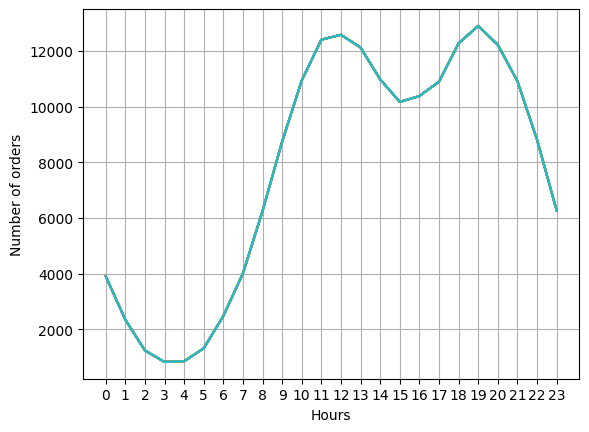

In [18]:
hours = [hour for hour , df in df.groupby('Hour')]

plt.plot(hours , df.groupby(['Hour']).count())

plt.xlabel('Hours')
plt.ylabel('Number of orders')

plt.xticks(hours)
plt.grid()
plt.show()

# Which products are mostly sold together

In [19]:
df  = df[df['Order ID'].duplicated()]
df.head(10)  # for products sold together order id must be same

Order ID                     Product  Quantity Ordered  Price Each  \
4     176560            Wired Headphones                 1       11.99   
19    176574        USB-C Charging Cable                 1       11.95   
31    176585  Bose SoundSport Headphones                 1       99.99   
33    176586                Google Phone                 1      600.00   
120   176672        USB-C Charging Cable                 1       11.95   
130   176681             ThinkPad Laptop                 1      999.99   
139   176689      AAA Batteries (4-pack)                 2        2.99   
190   176739                Google Phone                 1      600.00   
226   176774        USB-C Charging Cable                 1       11.95   
234   176781    Lightning Charging Cable                 1       14.95   

             Order Date                         Purchase Address  month  \
4   2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
19  2019-04-03 19:42:00        20 Hill St, Los Angeles, CA 90001      4   
31  2019-04-07 11:31:00        823 Highland St, Boston, MA 02215      4   
33  2019-04-10 17:00:00   365 Center St, San Francisco, CA 94016      4   
120 2019-04-12 11:07:00    778 Maple St, New York City, NY 10001      4   
130 2019-04-20 10:39:00         331 Cherry St, Seattle, WA 98101      4   
139 2019-04-24 17:15:00  659 Lincoln St, New York City, NY 10001      4   
190 2019-04-05 17:38:00             730 6th St, Austin, TX 73301      4   
226 2019-04-25 15:06:00     372 Church St, Los Angeles, CA 90001      4   
234 2019-04-03 07:37:00         976 Hickory St, Dallas, TX 75001      4   

      sales                 city  Hour  Minute  
4     11.99     Los Angeles (CA)    14      38  
19    11.95     Los Angeles (CA)    19      42  
31    99.99          Boston (MA)    11      31  
33   600.00   San Francisco (CA)    17       0  
120   11.95   New York City (NY)    11       7  
130  999.99         Seattle (WA)    10      39  
139    5.98   New York City (NY)    17      15  
190  600.00          Austin (TX)    17      38  
226   11.95     Los Angeles (CA)    15       6  
234   14.95          Dallas (TX)     7      37

In [20]:
df  = df[df['Order ID'].duplicated(keep = False)]
df.head(10)  # for products sold together order id must be same

Order ID                     Product  Quantity Ordered  Price Each  \
251    176797  Bose SoundSport Headphones                 1       99.99   
252    176797            Wired Headphones                 1       11.99   
636    177167    Apple Airpods Headphones                 1      150.00   
637    177167      AAA Batteries (4-pack)                 3        2.99   
850    177367        USB-C Charging Cable                 1       11.95   
851    177367  Bose SoundSport Headphones                 1       99.99   
1308   177800        USB-C Charging Cable                 1       11.95   
1309   177800            Wired Headphones                 1       11.99   
1682   178158        USB-C Charging Cable                 1       11.95   
1683   178158            Wired Headphones                 1       11.99   

              Order Date                          Purchase Address  month  \
251  2019-04-21 08:54:00         923 Elm St, Los Angeles, CA 90001      4   
252  2019-04-21 08:54:00         923 Elm St, Los Angeles, CA 90001      4   
636  2019-04-28 16:40:00          39 Lakeview St, Boston, MA 02215      4   
637  2019-04-28 16:40:00          39 Lakeview St, Boston, MA 02215      4   
850  2019-04-05 07:52:00  141 Chestnut St, San Francisco, CA 94016      4   
851  2019-04-05 07:52:00  141 Chestnut St, San Francisco, CA 94016      4   
1308 2019-04-03 11:56:00            880 9th St, Portland, ME 04101      4   
1309 2019-04-03 11:56:00            880 9th St, Portland, ME 04101      4   
1682 2019-04-28 21:13:00    197 Center St, San Francisco, CA 94016      4   
1683 2019-04-28 21:13:00    197 Center St, San Francisco, CA 94016      4   

       sales                 city  Hour  Minute  
251    99.99     Los Angeles (CA)     8      54  
252    11.99     Los Angeles (CA)     8      54  
636   150.00          Boston (MA)    16      40  
637     8.97          Boston (MA)    16      40  
850    11.95   San Francisco (CA)     7      52  
851    99.99   San Francisco (CA)     7      52  
1308   11.95        Portland (ME)    11      56  
1309   11.99        Portland (ME)    11      56  
1682   11.95   San Francisco (CA)    21      13  
1683   11.99   San Francisco (CA)    21      13

In [21]:
df['grouped']  = df.groupby('Order ID')['Product'].transform( lambda x: ','.join(x))





In [22]:
old_df=df                                                                          # making a copy of df
df =df.drop(columns =df.loc[ : , ~df.columns.isin(['grouped' , 'Order ID'])])
df.head(100)
#df =df[['Order ID' , 'grouped']].drop_duplicates




Order ID                                            grouped
251     176797        Bose SoundSport Headphones,Wired Headphones
252     176797        Bose SoundSport Headphones,Wired Headphones
636     177167    Apple Airpods Headphones,AAA Batteries (4-pack)
637     177167    Apple Airpods Headphones,AAA Batteries (4-pack)
850     177367    USB-C Charging Cable,Bose SoundSport Headphones
...        ...                                                ...
29456   247264          Lightning Charging Cable,Wired Headphones
29457   247264          Lightning Charging Cable,Wired Headphones
30411   295681  USB-C Charging Cable,Bose SoundSport Headphone...
30412   295681  USB-C Charging Cable,Bose SoundSport Headphone...
30413   295681  USB-C Charging Cable,Bose SoundSport Headphone...

[100 rows x 2 columns]

In [23]:
df

Order ID                                            grouped
251      176797        Bose SoundSport Headphones,Wired Headphones
252      176797        Bose SoundSport Headphones,Wired Headphones
636      177167    Apple Airpods Headphones,AAA Batteries (4-pack)
637      177167    Apple Airpods Headphones,AAA Batteries (4-pack)
850      177367    USB-C Charging Cable,Bose SoundSport Headphones
...         ...                                                ...
183718   256355  Lightning Charging Cable,Apple Airpods Headphones
185961   258514              USB-C Charging Cable,Wired Headphones
185962   258514              USB-C Charging Cable,Wired Headphones
186784   259297  Lightning Charging Cable,Lightning Charging Cable
186785   259297  Lightning Charging Cable,Lightning Charging Cable

[735 rows x 2 columns]

In [24]:
df.drop_duplicates(subset = ["grouped"]  ,keep ='first')

Order ID                                            grouped
251      176797        Bose SoundSport Headphones,Wired Headphones
636      177167    Apple Airpods Headphones,AAA Batteries (4-pack)
850      177367    USB-C Charging Cable,Bose SoundSport Headphones
1308     177800              USB-C Charging Cable,Wired Headphones
1682     178158  USB-C Charging Cable,Wired Headphones,USB-C Ch...
4521     180884          Lightning Charging Cable,Wired Headphones
4832     181177           Lightning Charging Cable,Vareebadd Phone
6241     182523  Lightning Charging Cable,Lightning Charging Cable
7130     183361  Lightning Charging Cable,Apple Airpods Headphones
12099    188097              USB-C Charging Cable,27in FHD Monitor
15919    191742          Apple Airpods Headphones,Wired Headphones
17768    193511  USB-C Charging Cable,Bose SoundSport Headphone...
20486    238691               USB-C Charging Cable,Vareebadd Phone
24919    242936  Lightning Charging Cable,Apple Airpods Headpho...
31118    296353  Lightning Charging Cable,Wired Headphones,AA B...
32383    297554                        USB-C Charging Cable,iPhone
39980    304802  USB-C Charging Cable,Bose SoundSport Headphone...
47910    312407  USB-C Charging Cable,Wired Headphones,Apple Ai...
55952    150925                    Lightning Charging Cable,iPhone
56625    151568              Wired Headphones,USB-C Charging Cable
61665    156365                            Wired Headphones,iPhone
64619    159197          Wired Headphones,Apple Airpods Headphones
66348    160873  Lightning Charging Cable,Apple Airpods Headpho...
66412    160928            Wired Headphones,27in 4K Gaming Monitor
67452    161920        USB-C Charging Cable,AAA Batteries (4-pack)
74484    147831         USB-C Charging Cable,AA Batteries (4-pack)
77086    150323      USB-C Charging Cable,Apple Airpods Headphones
81155    226625  USB-C Charging Cable,Wired Headphones,Wired He...
81960    227400                Wired Headphones,Macbook Pro Laptop
90730    235798  USB-C Charging Cable,Wired Headphones,27in FHD...
101164   218995    Lightning Charging Cable,34in Ultrawide Monitor
102223   220013        Bose SoundSport Headphones,27in FHD Monitor
105455   162189    Lightning Charging Cable,27in 4K Gaming Monitor
109105   165665  USB-C Charging Cable,Wired Headphones,AA Batte...
112173   168607  Apple Airpods Headphones,Bose SoundSport Headp...
112862   169266              Lightning Charging Cable,Google Phone
120658   194253  Lightning Charging Cable,Wired Headphones,USB-...
125148   198514          USB-C Charging Cable,USB-C Charging Cable
129527   202679          Wired Headphones,Lightning Charging Cable
129619   202765      Lightning Charging Cable,USB-C Charging Cable
130254   203365  Bose SoundSport Headphones,Apple Airpods Headp...
132376   205397             Wired Headphones,AA Batteries (4-pack)
136430   209269     Lightning Charging Cable,AA Batteries (4-pack)
151044   292098      USB-C Charging Cable,Lightning Charging Cable
152662   293647    Lightning Charging Cable,AAA Batteries (4-pack)
158366   262772  Bose SoundSport Headphones,Lightning Charging ...
167678   271668           Bose SoundSport Headphones,Flatscreen TV
169541   273447             Lightning Charging Cable,Flatscreen TV
174202   277875       USB-C Charging Cable,Wired Headphones,iPhone

In [25]:
#df.drop_duplicates(subset = ["Order ID"] ,keep ='first' )


In [26]:
from  itertools import combinations
from collections import Counter


count =Counter()


for row in df['grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list ,1)))
  #count.update(Counter(combinations(row_list ,2)))           #works
  #count.update(Counter(combinations(row_list ,3)))           #works

#count.most_common(10)                                          #works
for key ,value in  count.most_common(10):
  print(key,value)

('Wired Headphones',) 491
('USB-C Charging Cable',) 380
('Lightning Charging Cable',) 257
('Bose SoundSport Headphones',) 166
('Apple Airpods Headphones',) 164
('AA Batteries (4-pack)',) 16
('AAA Batteries (4-pack)',) 14
('iPhone',) 9
('27in FHD Monitor',) 7
('Google Phone',) 6


# Which product sold the most and  why

In [27]:
#product_group = old_df.groupby('Product')

#product_group.sum()

#quantity_ordered = product_group['Quantity Ordered'].sum()

#products = [product for product , df in  product_group]

#plt.bar(products,quantity_ordered)

#plt.xticks(products, rotation = 'vertical')
#plt.xlabel('product')
#plt.ylabel('quantity ordered')

Text(0, 0.5, 'quantity ordered')

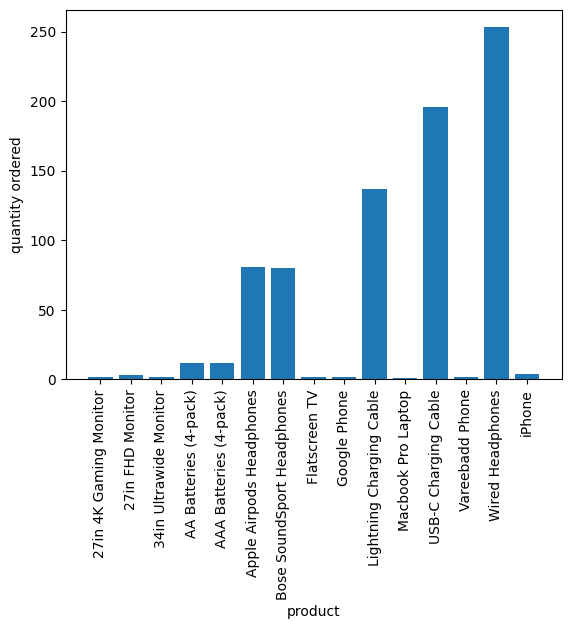

In [28]:
product_group = old_df.groupby('Product')

# Select only the numeric columns before performing the sum
quantity_ordered = product_group['Quantity Ordered'].sum()

products = [product for product , df in  product_group]

plt.bar(products,quantity_ordered)

plt.xticks(products, rotation = 'vertical')
plt.xlabel('product')
plt.ylabel('quantity ordered')

In [29]:
#prices = old_df.groupby('Product').mean()['Price Each']

#fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
#ax1.bar(products, quantity_ordered, color='g')
#ax2.plot(products, prices, color='b')

#ax1.set_xlabel('Product Name')
#ax1.set_ylabel('Quantity Ordered', color='g')
#ax2.set_ylabel('Price ($)', color='b')
#ax1.set_xticklabels(products, rotation='vertical', size=8)

#fig.show()

<ipython-input-30-d06c99bfc59d>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


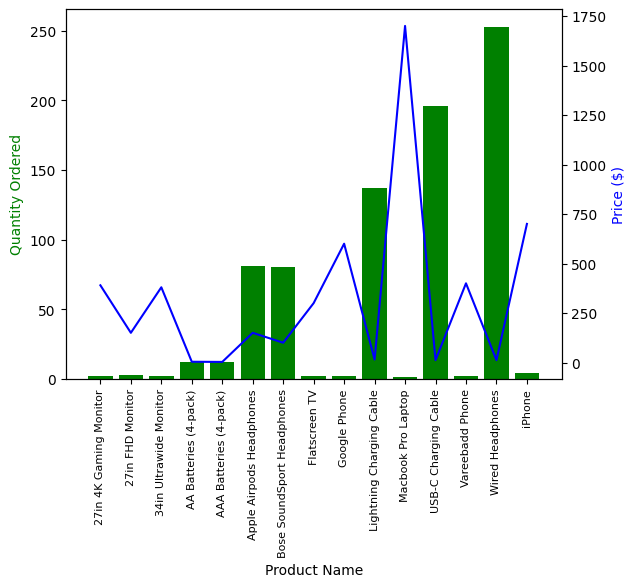

In [30]:
# Ensure 'Price Each' is numeric before calculating the mean
old_df['Price Each'] = pd.to_numeric(old_df['Price Each'], errors='coerce')

# Droppng rows where the conversion resulted in NaN
old_df.dropna(subset=['Price Each'], inplace=True)

prices = old_df.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

Preprocessed data for supervised learning:
     month   sales  Hour  Minute  Product_27in FHD Monitor  \
251      4   99.99     8      54                     False   
252      4   11.99     8      54                     False   
636      4  150.00    16      40                     False   
637      4    8.97    16      40                     False   
850      4   11.95     7      52                     False   

     Product_34in Ultrawide Monitor  Product_AA Batteries (4-pack)  \
251                           False                          False   
252                           False                          False   
636                           False                          False   
637                           False                          False   
850                           False                          False   

     Product_AAA Batteries (4-pack)  Product_Apple Airpods Headphones  \
251                           False                             False   
252              

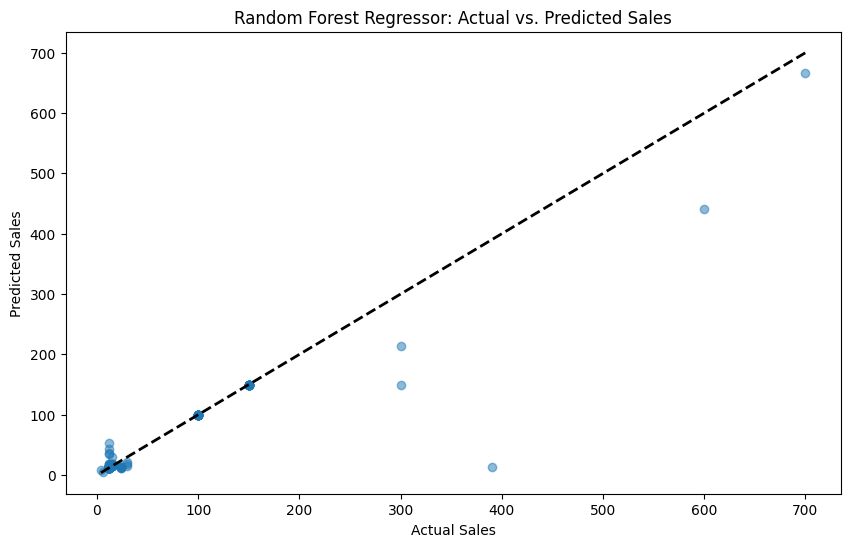


Training XGBoost Regressor...
XGBoost Regressor - R² Score: 0.8794
XGBoost Regressor - MSE: 1070.0227
XGBoost Regressor - RMSE: 32.7112


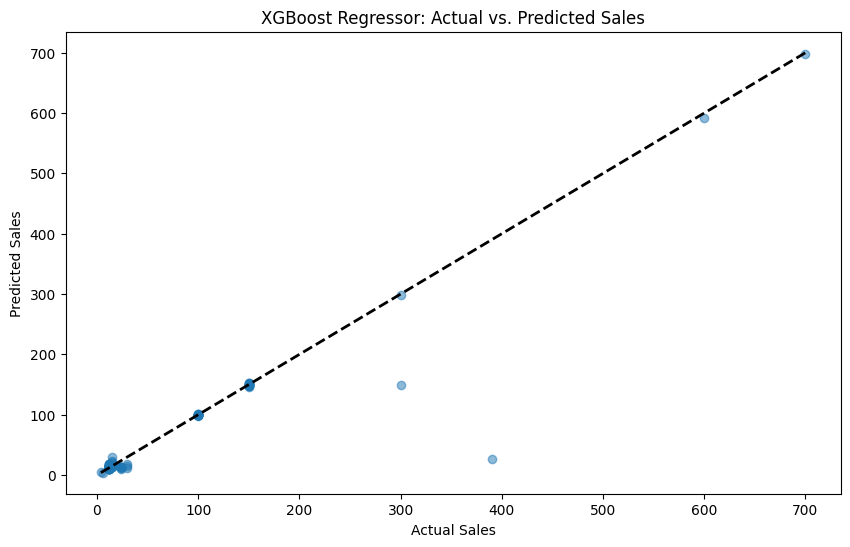


Training MLP Regressor...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor - R² Score: 0.5856
MLP Regressor - MSE: 3678.1851
MLP Regressor - RMSE: 60.6480


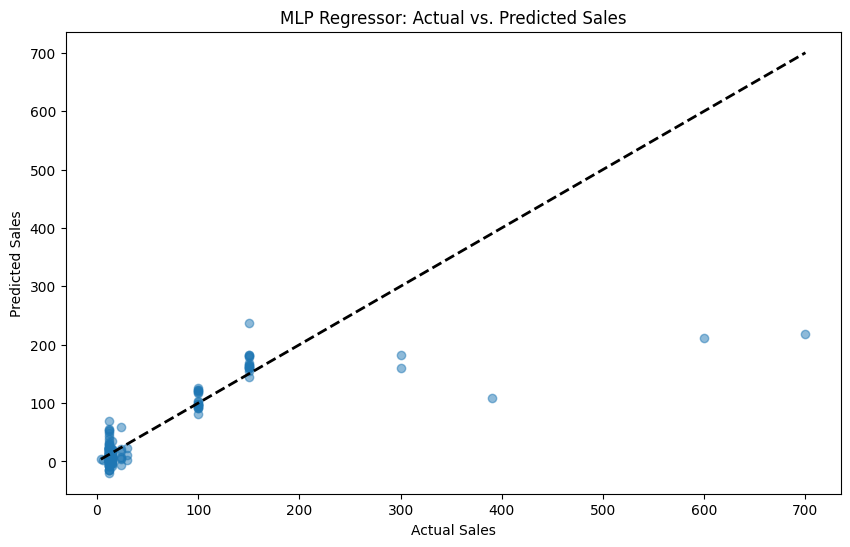


--- Model Performance Comparison ---
                               R²          MSE       RMSE
Random Forest Regressor  0.844227  1382.602530  37.183364
XGBoost Regressor        0.879444  1070.022747  32.711202
MLP Regressor            0.585592  3678.185124  60.648043


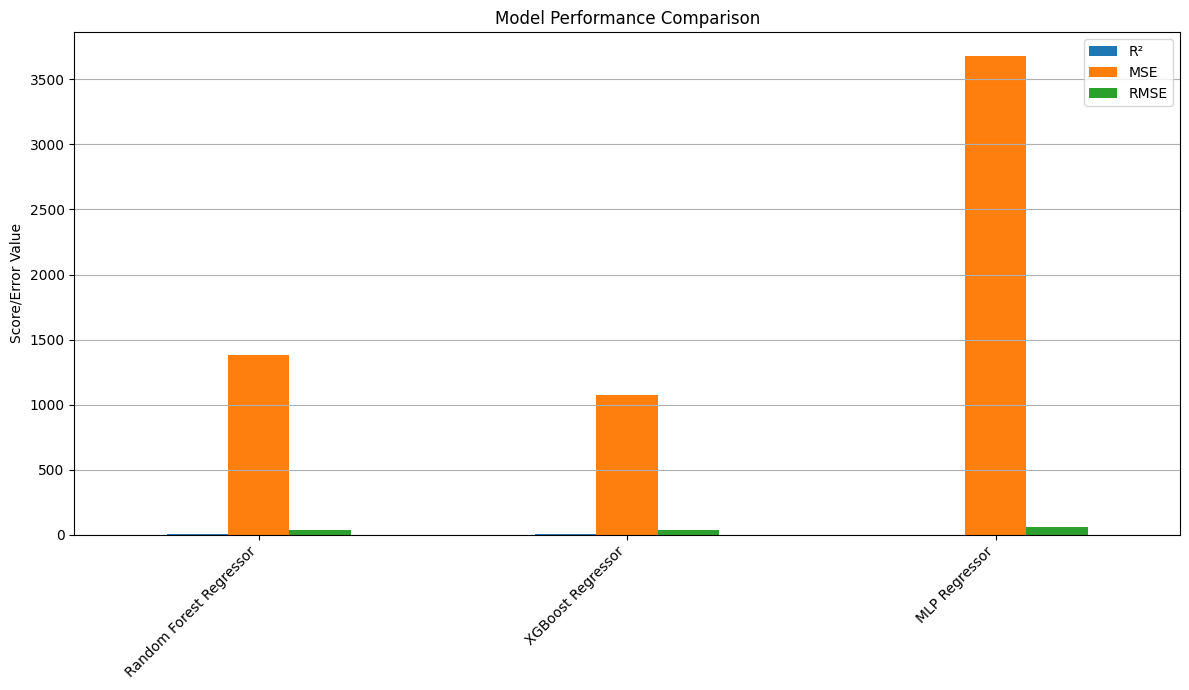


--- Hyperparameter Tuning using GridSearchCV ---
Performing GridSearchCV for Random Forest...

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best R² score on training data (cross-validation): 0.6177691788368013
Tuned Random Forest - R² Score on Test Set: 0.8424
Tuned Random Forest - MSE on Test Set: 1398.7506
Tuned Random Forest - RMSE on Test Set: 37.3999

Performing GridSearchCV for XGBoost...

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best R² score on training data (cross-validation): 0.6771232528876491
Tuned XGBoost - R² Score on Test Set: 0.8848
Tuned XGBoost - MSE on Test Set: 1022.2674
Tuned XGBoost - RMSE on Test Set: 31.9729

--- Final Model Performance Comparison (Including Tuned) ---
                                       R²          MSE       RMSE
Random Forest Regressor          0.844227  1382.602530  37.183364
XGBoost Regressor                0.879444  1070.022747  32.71120

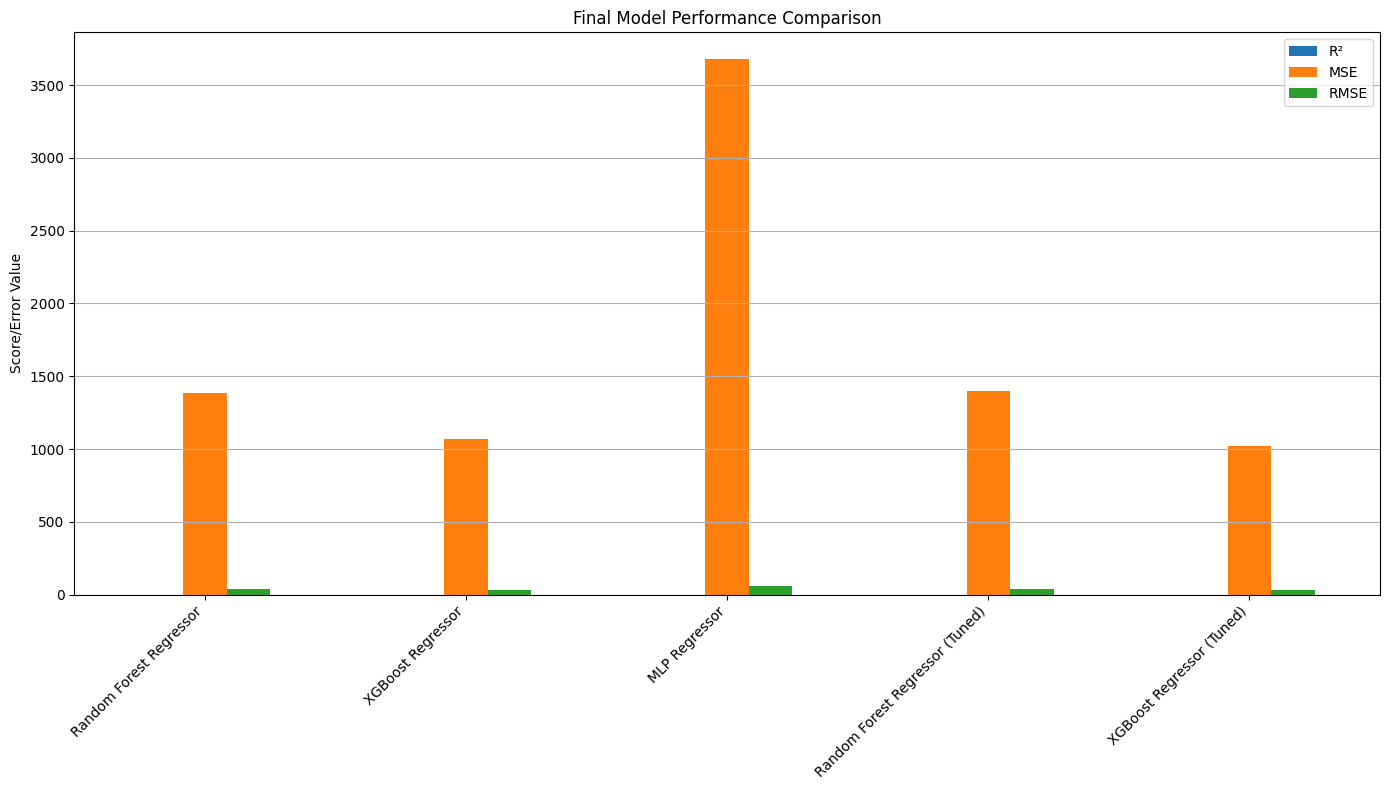

In [35]:
# prompt: please code the following Preprocess the data for supervised learning (e.g., predict sales or classify high vs. low sales).
# Add the following models:
# Random Forest Regressor
# Gradient Boosting Regressor (XGBoost or LightGBM)
# Neural Network (MLPRegressor from scikit-learn)
# Compare them using R² Score, MSE, and visual plots.
# Apply basic optimization using GridSearchCV on the top models. and if you can please use the pre processing that I've done above as much as you can and if you find something missing only then code that pre processing part if that's not feasable then you can go as you like but in the end make sure to compare all the models to choose which one is the best  and make it easier for beginner or entry level fresher and not too complecated .Thanks and please expalin code using comments.

# --- Preprocessing for Supervised Learning ---

# We will use the 'old_df' DataFrame as it contains the original columns.
# The target variable is 'sales'.
# We need to select features that can predict sales.

# Drop columns that are not useful for prediction or are derived from the target.
# 'Order ID', 'Order Date', 'Purchase Address', 'grouped' are not directly useful as numerical features.
# 'month', 'city', 'Hour', 'Minute' are potentially useful but need encoding.
# 'Quantity Ordered', 'Price Each' are components of sales, using them as features might lead to data leakage.
# We will use 'Product', 'month', 'city', 'Hour', 'Minute' as features.
df_supervised = old_df.copy()

# Drop columns we won't use as features
df_supervised = df_supervised.drop(columns=['Order ID', 'Order Date', 'Purchase Address', 'grouped', 'Quantity Ordered', 'Price Each'])

# Convert categorical features ('Product', 'city') into numerical representation using One-Hot Encoding.
# This creates new columns for each unique category in these columns.
df_supervised = pd.get_dummies(df_supervised, columns=['Product', 'city'], drop_first=True) # drop_first prevents multicollinearity

# Display the first few rows of the preprocessed data
print("Preprocessed data for supervised learning:")
print(df_supervised.head())

# Separate features (X) and target variable (y)
X = df_supervised.drop(columns=['sales'])
y = df_supervised['sales']

# Split the data into training and testing sets.
# Training data is used to train the model.
# Testing data is used to evaluate the model's performance on unseen data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% for training, 20% for testing

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# --- Model Training and Evaluation ---

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Initialize the models
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42)
mlp_reg = MLPRegressor(random_state=42, max_iter=500) # Increased max_iter for better convergence

# Dictionary to store model performance metrics
model_performance = {}

# Function to train, evaluate, and store results
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Root Mean Squared Error is often more interpretable

    print(f"{model_name} - R² Score: {r2:.4f}")
    print(f"{model_name} - MSE: {mse:.4f}")
    print(f"{model_name} - RMSE: {rmse:.4f}")

    # Store the metrics
    model_performance[model_name] = {'R²': r2, 'MSE': mse, 'RMSE': rmse, 'Predictions': y_pred}

    # Visualize predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for ideal predictions
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"{model_name}: Actual vs. Predicted Sales")
    plt.show()

# Train and evaluate each model
train_and_evaluate(rf_reg, X_train, y_train, X_test, y_test, "Random Forest Regressor")
train_and_evaluate(xgb_reg, X_train, y_train, X_test, y_test, "XGBoost Regressor")
# Note: MLPRegressor can be sensitive to feature scaling.
# For simplicity in this basic example, we'll skip scaling, but it's recommended for better MLP performance.
train_and_evaluate(mlp_reg, X_train, y_train, X_test, y_test, "MLP Regressor")


# --- Comparing Models ---

print("\n--- Model Performance Comparison ---")
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
print(performance_df[['R²', 'MSE', 'RMSE']])

# Visualize performance metrics
performance_df[['R²', 'MSE', 'RMSE']].plot(kind='bar', figsize=(12, 7))
plt.title("Model Performance Comparison")
plt.ylabel("Score/Error Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Basic Optimization with GridSearchCV on Top Models ---

# Based on the initial comparison, let's assume Random Forest and XGBoost performed well.
# We will perform a simple GridSearchCV on a few key parameters for these two models.
# GridSearchCV helps find the best combination of hyperparameters by trying out different values.

print("\n--- Hyperparameter Tuning using GridSearchCV ---")

# Define the parameter grid for Random Forest
# This is a small grid for demonstration purposes.
param_grid_rf = {
    'n_estimators': [50, 100], # Number of trees in the forest
    'max_depth': [10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5] # Minimum number of samples required to split an internal node
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2', n_jobs=-1) # cv=3 for 3-fold cross-validation

print("Performing GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train, y_train)

print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Best R² score on training data (cross-validation):", grid_search_rf.best_score_)

# Evaluate the best Random Forest model on the test set
best_rf_reg = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_reg.predict(X_test)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mse_rf_tuned)

print(f"Tuned Random Forest - R² Score on Test Set: {r2_rf_tuned:.4f}")
print(f"Tuned Random Forest - MSE on Test Set: {mse_rf_tuned:.4f}")
print(f"Tuned Random Forest - RMSE on Test Set: {rmse_rf_tuned:.4f}")


# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1], # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5]         # Maximum depth of a tree
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring='r2', n_jobs=-1)

print("\nPerforming GridSearchCV for XGBoost...")
grid_search_xgb.fit(X_train, y_train)

print("\nBest parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best R² score on training data (cross-validation):", grid_search_xgb.best_score_)

# Evaluate the best XGBoost model on the test set
best_xgb_reg = grid_search_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb_reg.predict(X_test)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)

print(f"Tuned XGBoost - R² Score on Test Set: {r2_xgb_tuned:.4f}")
print(f"Tuned XGBoost - MSE on Test Set: {mse_xgb_tuned:.4f}")
print(f"Tuned XGBoost - RMSE on Test Set: {rmse_xgb_tuned:.4f}")

# --- Final Comparison including Tuned Models ---

print("\n--- Final Model Performance Comparison (Including Tuned) ---")

# Update the model_performance dictionary with tuned models
model_performance['Random Forest Regressor (Tuned)'] = {'R²': r2_rf_tuned, 'MSE': mse_rf_tuned, 'RMSE': rmse_rf_tuned, 'Predictions': y_pred_rf_tuned}
model_performance['XGBoost Regressor (Tuned)'] = {'R²': r2_xgb_tuned, 'MSE': mse_xgb_tuned, 'RMSE': rmse_xgb_tuned, 'Predictions': y_pred_xgb_tuned}

final_performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
print(final_performance_df[['R²', 'MSE', 'RMSE']])

# Visualize final performance metrics
final_performance_df[['R²', 'MSE', 'RMSE']].plot(kind='bar', figsize=(14, 8))
plt.title("Final Model Performance Comparison")
plt.ylabel("Score/Error Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Conclusion: Based on the final performance comparison (R², MSE, RMSE), you can identify which model performed best on the test data.
# A higher R² and lower MSE/RMSE indicate better performance.



--- Hyperparameter Tuning using GridSearchCV for MLP Regressor ---
Performing GridSearchCV for MLP Regressor...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Best parameters for MLP Regressor: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best R² score on training data (cross-validation): 0.5729569861565218
Tuned MLP Regressor - R² Score on Test Set: 0.9081
Tuned MLP Regressor - MSE on Test Set: 815.7056
Tuned MLP Regressor - RMSE on Test Set: 28.5606

--- Final Model Performance Comparison (Including Tuned) ---
                                       R²          MSE       RMSE
Random Forest Regressor          0.844227  1382.602530  37.183364
XGBoost Regressor                0.879444  1070.022747  32.711202
MLP Regressor                    0.585592  3678.185124  60.648043
Random Forest Regressor (Tuned)  0.842408  1398.750644  37.399875
XGBoost Regressor (Tuned)        0.884825  1022.267361  31.972916
MLP Regressor (Tuned)            0.908097   815.705625  28.560561


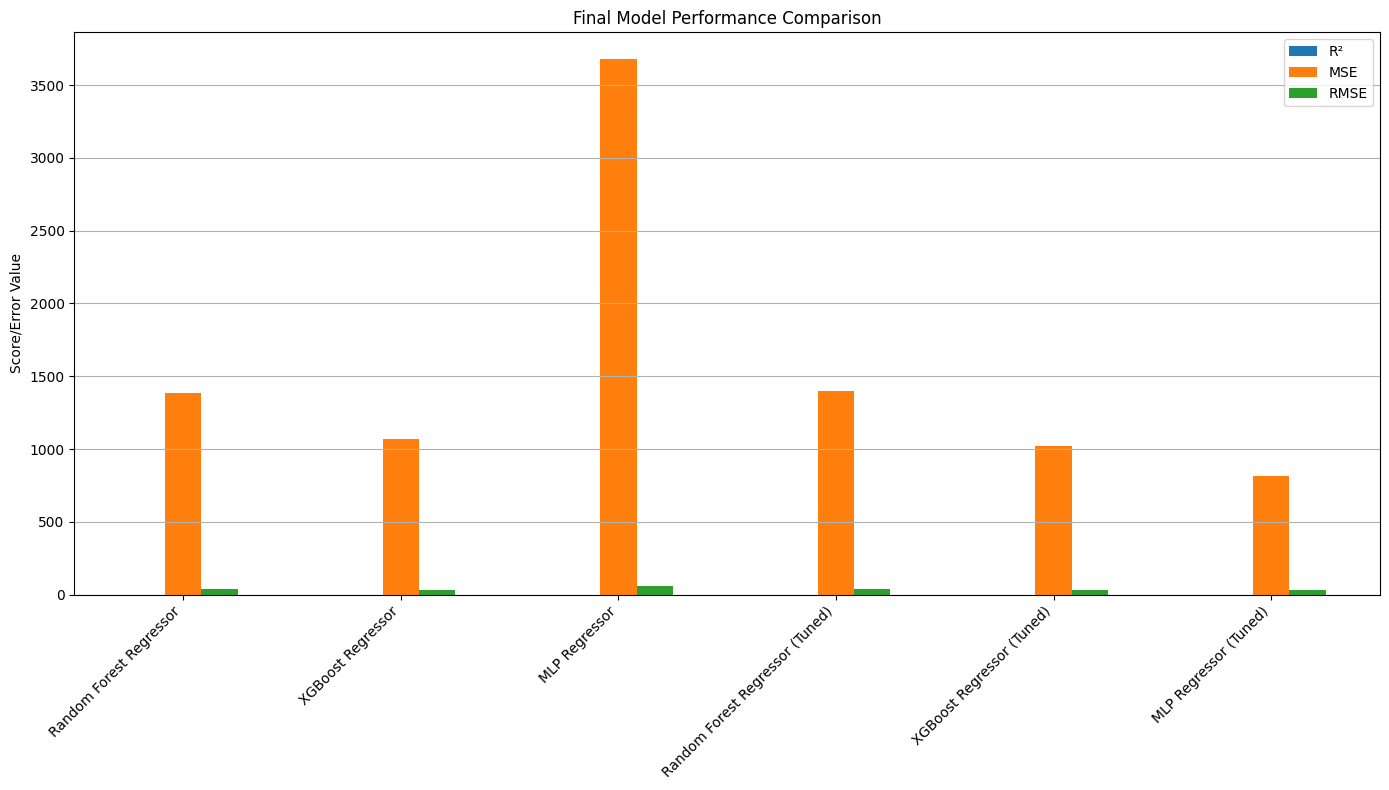

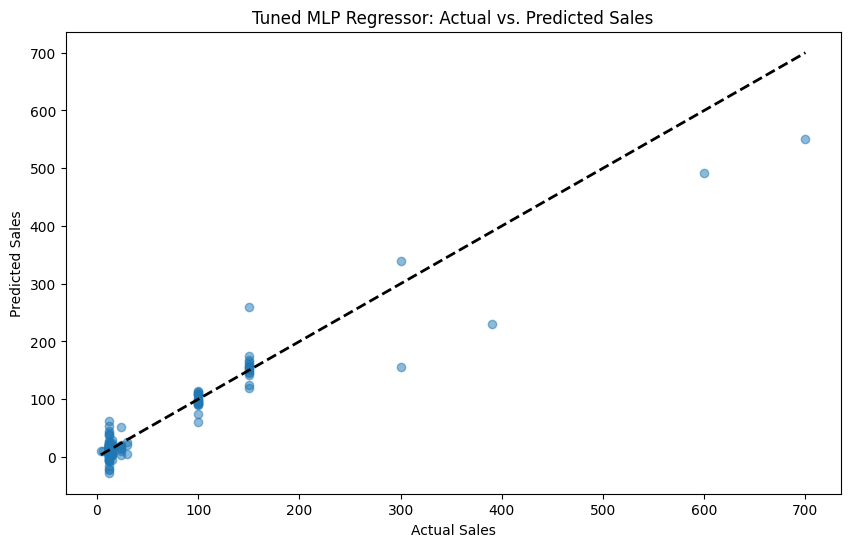

In [36]:
# prompt: Ok but you haven't tuned MLP regressor and one more thing the performance of MLP regressor is very bad which usually doesn't happen so please try again keeping in mind the previous promt and this one then compare all models after tuning .

# --- Tuning MLP Regressor and Final Comparison ---

print("\n--- Hyperparameter Tuning using GridSearchCV for MLP Regressor ---")

# MLP Regressor can be sensitive to scaling, but we'll perform tuning first without explicit scaling for now.
# A proper pipeline with scaling would be more robust.

# Define the parameter grid for MLP Regressor
# This includes parameters related to the network architecture (hidden layers) and training (activation, solver, alpha).
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Different number of neurons and layers
    'activation': ['relu', 'tanh'],             # Activation function for hidden layers
    'solver': ['adam', 'sgd'],                  # The solver for weight optimization
    'alpha': [0.0001, 0.001]                    # L2 penalty (regularization term) parameter
}

# Initialize GridSearchCV for MLP Regressor
# Increased max_iter within the grid search
grid_search_mlp = GridSearchCV(MLPRegressor(random_state=42, max_iter=1000), param_grid_mlp, cv=3, scoring='r2', n_jobs=-1)

print("Performing GridSearchCV for MLP Regressor...")
# It's important to handle potential convergence warnings during grid search for MLP.
# For a full-fledged solution, you might need to adjust `max_iter` further or use a pipeline with scaling.
# For this example, we'll proceed, but be aware of potential warnings.
grid_search_mlp.fit(X_train, y_train)

print("\nBest parameters for MLP Regressor:", grid_search_mlp.best_params_)
print("Best R² score on training data (cross-validation):", grid_search_mlp.best_score_)

# Evaluate the best MLP Regressor model on the test set
best_mlp_reg = grid_search_mlp.best_estimator_
y_pred_mlp_tuned = best_mlp_reg.predict(X_test)
r2_mlp_tuned = r2_score(y_test, y_pred_mlp_tuned)
mse_mlp_tuned = mean_squared_error(y_test, y_pred_mlp_tuned)
rmse_mlp_tuned = np.sqrt(mse_mlp_tuned)

print(f"Tuned MLP Regressor - R² Score on Test Set: {r2_mlp_tuned:.4f}")
print(f"Tuned MLP Regressor - MSE on Test Set: {mse_mlp_tuned:.4f}")
print(f"Tuned MLP Regressor - RMSE on Test Set: {rmse_mlp_tuned:.4f}")

# --- Final Comparison including Tuned Models ---

print("\n--- Final Model Performance Comparison (Including Tuned) ---")

# Update the model_performance dictionary with the tuned MLP model
model_performance['MLP Regressor (Tuned)'] = {'R²': r2_mlp_tuned, 'MSE': mse_mlp_tuned, 'RMSE': rmse_mlp_tuned, 'Predictions': y_pred_mlp_tuned}

# Create a DataFrame for final comparison
final_performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
print(final_performance_df[['R²', 'MSE', 'RMSE']])

# Visualize final performance metrics
final_performance_df[['R²', 'MSE', 'RMSE']].plot(kind='bar', figsize=(14, 8))
plt.title("Final Model Performance Comparison")
plt.ylabel("Score/Error Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot predictions vs actual for the tuned MLP Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line for ideal predictions
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Tuned MLP Regressor: Actual vs. Predicted Sales")
plt.show()

# Conclusion: Based on the final performance comparison (R², MSE, RMSE) including the tuned models,
# you can now identify which model performed best on the test data after tuning.
# A higher R² and lower MSE/RMSE are indicative of better performance.
